In [15]:
from keras.applications.vgg16 import VGG16

model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

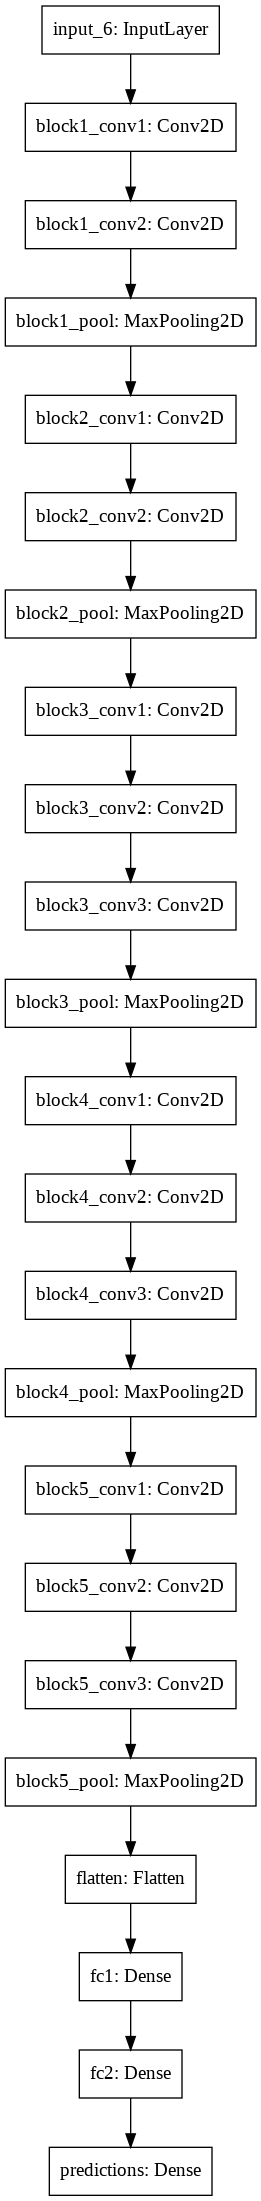

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

In [17]:
#１からVGG16モデルを組む

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

num_classes = 1000

#configure
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

#model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator

#Deep Learning Libraries
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras .optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

#specifically for cnn
from keras.layers import Dropout, Flatten, Activation, Lambda
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

In [18]:
_input = Input(shape=(150, 150, 3))

x = Lambda(lambda image: tf.image.resize(image, (224, 224)))(_input)


conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(x)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(conv1)
pool1 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block1_pool')(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(pool1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(conv3)
pool2 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block2_pool')(conv4)

conv5 = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(pool2)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(conv5)
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(conv6)
pool3 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block3_pool')(conv7)

conv8 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(pool3)
conv9 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(conv8)
conv10 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(conv9)
pool4 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block4_pool')(conv10)

conv11 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(pool4)
conv12 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(conv11)
conv13 = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(conv12)
pool5 = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block5_pool')(conv13)

flat = Flatten(name='flatten')(pool5)
dense1 = Dense(4096, activation='relu', name='fc1')(flat)
dropout1 = Dropout(0.5, name='dropout1')(dense1)
dense2 = Dense(4096, activation='relu', name='fc2')(dropout1)
dropout2 = Dropout(0.5, name='dropout2')(dense2)
output = Dense(num_classes, activation='softmax', name='output')(dropout2)


from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor='val_acc',
                           factor=0.1,
                           patience=5,
                           verbose=1,
                           mode='auto',
                           min_data=0.0001,
                           cooldown=0,
                           min_lr=0.00001)

import keras
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

_model = Model(inputs=_input, outputs=output)
_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)    

In [19]:
!ls

mug.jpg  sample_data  vgg.png


In [20]:
from keras.preprocessing.image import load_img

image = load_img('mug.jpg', target_size=(224, 224))

In [21]:
#ピクセルを配列に置き換える
from keras.preprocessing.image import img_to_array
image = img_to_array(image)

In [22]:
#reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [25]:
#VGGモデルに画像を投入するための前処理
from keras.applications.vgg16 import preprocess_input
#prepare the image for the VGG model
image = preprocess_input(image)

In [26]:
#predict
y = model.predict(image)

In [27]:
#出力
from keras.applications.vgg16 import decode_predictions
#convert the probabilities to class labels
label = decode_predictions(y)
#retrieve the most likely result, e.g. highest probability
label = label[0][0]
#print the classification
print('%s(%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
coffee_mug(77.46%)
